<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/main/SequentialModel2_0_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0

!wget https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0

--2021-02-25 12:20:41--  https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/960snngb5e4wlld/DatasetBinaryClassification.zip [following]
--2021-02-25 12:20:42--  https://www.dropbox.com/s/raw/960snngb5e4wlld/DatasetBinaryClassification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08c1168bc6629ac5a16b5d2756.dl.dropboxusercontent.com/cd/0/inline/BJnU6g05HExx18UYk1F5z3yDFwBhf549M_2d60oUjdkMu62KbQya2kciSC5_MGMluHH06bB4NKGCadJIMQnR-pzV-fp_Vxb_DehvK7h3OFqfS7LZ0hSpineUlYbBywwwc8I/file# [following]
--2021-02-25 12:20:43--  https://uc08c1168bc6629ac5a16b5d2756.dl.dropboxusercontent.com/cd/0/inline/BJnU6g05HExx18UYk1F5z3yDFwBhf549M_2d60oUjdkMu6

In [3]:
#Extracting the compressed dataset
!unzip /content/DatasetBinaryClassification.zip?dl=0

Archive:  /content/DatasetBinaryClassification.zip?dl=0
   creating: DatasetBinaryClassification/
   creating: DatasetBinaryClassification/Test/
   creating: DatasetBinaryClassification/Test/COVID/
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1014).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1033).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1051).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1056).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1064).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1067).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1075).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1089).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (110).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1103).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1116).png  
  inflating: DatasetBi

In [4]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_images_path = "DatasetBinaryClassification/Train"
validation_images_path = "DatasetBinaryClassification/Validation"
test_images_path = "DatasetBinaryClassification/Test"

In [8]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

#Preprocessing the training data
train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256), # this or (100,100) is also a good option
    batch_size = 32,
    color_mode="grayscale",
    class_mode = "binary",
    shuffle = True,
    seed =40
    )

train_generator.class_indices
inp_shape= train_generator.image_shape
print(inp_shape)

Found 2034 images belonging to 2 classes.
(256, 256, 1)


In [7]:
validation_dataset = image.ImageDataGenerator(rescale = 1./255) #Rescaling the validation images 

#Preprocessing the validation dataset
validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 32,
    color_mode = "grayscale" ,
    class_mode = "binary",
    shuffle = True,
    seed =40
    )

validation_generator.class_indices

Found 254 images belonging to 2 classes.


{'COVID': 0, 'Non-COVID': 1}

In [12]:
# Sequential Model with 6 convolutional layers

seqmodel2 = Sequential()

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))


seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Flatten())

seqmodel2.add(Dense(128, activation = 'relu'))

seqmodel2.add(Dense(64, activation = 'relu'))

seqmodel2.add(Dense(1, activation = 'sigmoid'))


seqmodel2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
seqmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 32)       

(None, 256, 256, 1)


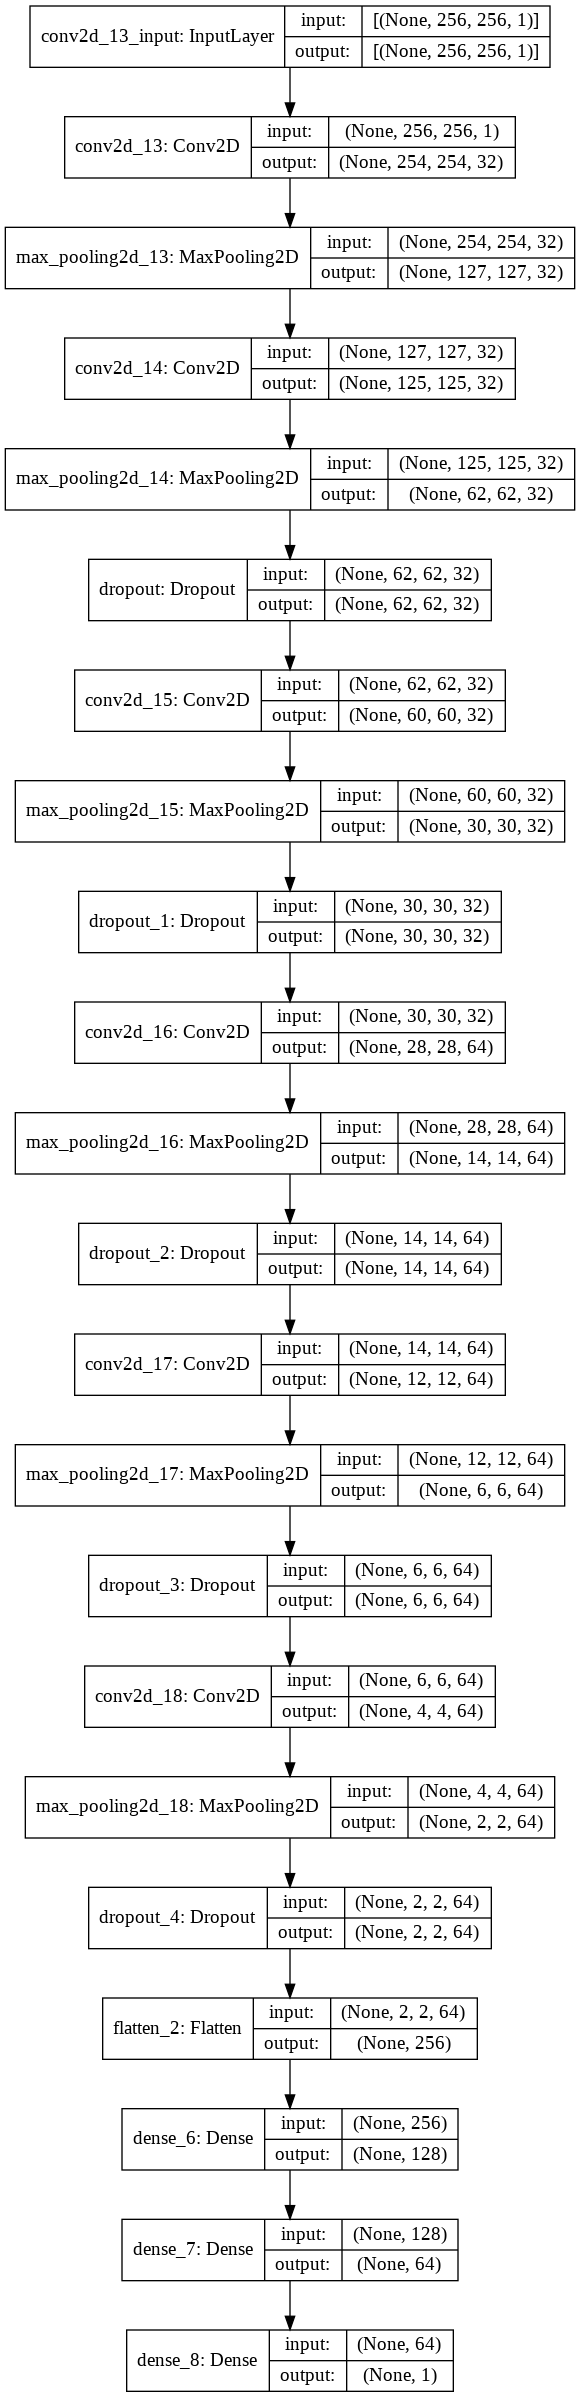

In [14]:
print(seqmodel2.input.shape)
plot_model(seqmodel2,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [15]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

63
7


In [17]:
history = seqmodel2.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN, 
    epochs=30,
    validation_data = validation_generator,
    validation_steps = STEP_SIZE_VALID
    )

Epoch 1/30
63/63 [==============================] - 41s 537ms/step - loss: 0.6829 - accuracy: 0.5601 - val_loss: 0.5943 - val_accuracy: 0.8571
Epoch 2/30
63/63 [==============================] - 33s 526ms/step - loss: 0.4672 - accuracy: 0.7896 - val_loss: 0.2024 - val_accuracy: 0.9286
Epoch 3/30
63/63 [==============================] - 34s 531ms/step - loss: 0.2930 - accuracy: 0.9081 - val_loss: 0.2003 - val_accuracy: 0.9375
Epoch 4/30
63/63 [==============================] - 34s 532ms/step - loss: 0.1860 - accuracy: 0.9416 - val_loss: 0.1927 - val_accuracy: 0.9464
Epoch 5/30
63/63 [==============================] - 34s 531ms/step - loss: 0.1958 - accuracy: 0.9381 - val_loss: 0.1763 - val_accuracy: 0.9598
Epoch 6/30
63/63 [==============================] - 34s 535ms/step - loss: 0.2007 - accuracy: 0.9263 - val_loss: 0.1403 - val_accuracy: 0.9777
Epoch 7/30
63/63 [==============================] - 34s 540ms/step - loss: 0.1640 - accuracy: 0.9435 - val_loss: 0.1684 - val_accuracy: 0.9464

In [19]:
seqmodel2.save('SequentialModel2.0_Binaryv1.h5')

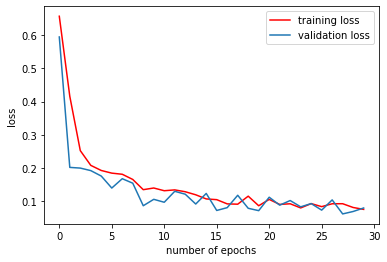

In [20]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

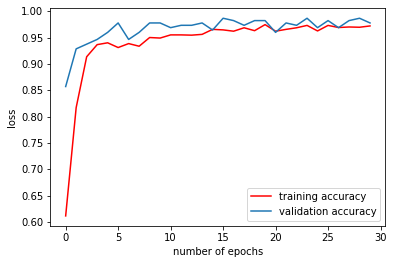

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()